In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
from PIL import Image

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

/home/dheer1206/anaconda3/envs/ai/lib/python3.5/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
import os

In [5]:
os.listdir()

['Point',
 'code.ipynb',
 'Five',
 'A',
 'final_out.csv',
 'temp.ipynb',
 'test',
 'C',
 'B',
 'All',
 'V',
 '.ipynb_checkpoints']

In [165]:
l=['A','B','C','Five','Point','V']
d = {}
cc = 0
for dire in l :
    c = 1
    d[dire[0]] = cc 
    print (dire[0])
    cc += 1
    for i in os.listdir(dire) :
        im = Image.open(dire + "/" + i)
        #rint ("All/" + dire + str(c) + ".jpg")
        im.save("All/" + dire + str(c) + ".jpg")
        c += 1 
        #im2 = mpimg.imread("Point1/" + str(c) + ".png")

A
B
C
F
P
V


In [166]:
d['P']

4

In [167]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#  Converting Images

In [168]:
from skimage.transform import resize

In [169]:
images = []
output = []
for i in os.listdir("All") :
    path = "All/" + i
    im = mpimg.imread(path)
    im2 = rgb2gray(im)
    im2 = resize(im2, (60,60), mode='reflect')
    im2 = im2.reshape((3600,))
    images.append(im2)
    output.append(int(d[i[0]]))

In [170]:
features = np.array(images)
features *= (1.0/255.0)
target = np.array(output)
target = target.reshape(4872,1)

In [171]:
def idid(i) :
    #print (type(i))
    l = []
    if (i <= 23) :
        l.append(0)
    elif (i <= 45) :
        l.append(1)
    elif (i<=74) :
        l.append(2)
    elif (i <= 103) :
        l.append(3)
    elif (i<=127) :
        l.append(4)
    elif (i<=170) :
        l.append(5)
    return int(l[0])

def convo(a) :
    ab = a.split('.') 
    return int(ab[0])    

In [172]:
images2 = []
output2 = []
c = 0
for i in os.listdir("test/data") :
    path = "test/data/" + i
    im = mpimg.imread(path)
    im2 = rgb2gray(im)
    im2 = resize(im2, (60,60), mode='reflect')
    im2 = im2.reshape((3600,))
    images2.append(im2)
    output2.append(idid(convo(i)))
    if (c == 157) :
        print (i + "intit")
    c += 1     
    print (i + " " + str(idid(convo(i))))

72.ppm 2
147.ppm 5
142.ppm 5
162.ppm 5
94.ppm 3
161.ppm 5
112.ppm 4
136.ppm 5
22.ppm 0
129.ppm 5
126.ppm 4
76.ppm 3
58.ppm 2
146.ppm 5
87.ppm 3
125.ppm 4
74.ppm 2
149.ppm 5
64.ppm 2
159.ppm 5
163.ppm 5
114.ppm 4
40.ppm 1
167.ppm 5
42.ppm 1
13.ppm 0
27.ppm 1
145.ppm 5
122.ppm 4
160.ppm 5
30.ppm 1
35.ppm 1
26.ppm 1
93.ppm 3
120.ppm 4
62.ppm 2
143.ppm 5
77.ppm 3
156.ppm 5
25.ppm 1
105.ppm 4
16.ppm 0
127.ppm 4
33.ppm 1
155.ppm 5
24.ppm 1
116.ppm 4
104.ppm 4
37.ppm 1
128.ppm 5
68.ppm 2
51.ppm 2
65.ppm 2
7.ppm 0
54.ppm 2
103.ppm 3
44.ppm 1
100.ppm 3
73.ppm 2
70.ppm 2
154.ppm 5
29.ppm 1
139.ppm 5
157.ppm 5
123.ppm 4
90.ppm 3
96.ppm 3
6.ppm 0
170.ppm 5
106.ppm 4
144.ppm 5
152.ppm 5
111.ppm 4
2.ppm 0
57.ppm 2
109.ppm 4
131.ppm 5
158.ppm 5
3.ppm 0
59.ppm 2
20.ppm 0
98.ppm 3
101.ppm 3
69.ppm 2
31.ppm 1
61.ppm 2
67.ppm 2
85.ppm 3
97.ppm 3
99.ppm 3
14.ppm 0
21.ppm 0
53.ppm 2
75.ppm 3
153.ppm 5
108.ppm 4
91.ppm 3
151.ppm 5
165.ppm 5
137.ppm 5
36.ppm 1
121.ppm 4
23.ppm 0
107.ppm 4
49.ppm 2
168.ppm 5


In [173]:
#from skimage.transform import resize
#my_image = resize(my_image, (28,28) , mode = 'reflect' )

In [177]:
features2 = np.array(images2)
features *= (1.0/255.0)
target2 = np.array(output2)
target2 = target2.reshape(170,1)

# Training Our Model

In [178]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

In [182]:
model = Sequential()

model.add(Dense(units=512, activation='relu', input_dim=3600))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=6, activation='softmax'))

model.compile( loss = keras.losses.categorical_crossentropy ,
               optimizer = keras.optimizers.Adam() ,
               metrics = ['accuracy'])

In [183]:
y_binary = to_categorical(target)
y2_binary = to_categorical(target2)

In [184]:
#model.fit(features,y_binary,epochs=15,batch_size=32,verbose=1)

In [185]:
model.fit(features,y_binary,epochs=15,batch_size=32,verbose=1,validation_data=(features2,y2_binary))

Train on 4872 samples, validate on 170 samples
Epoch 1/15
4872/4872 [==============================] - 5s 1ms/step - loss: 1.6983 - acc: 0.2800 - val_loss: 13.8426 - val_acc: 0.1412
Epoch 2/15
4872/4872 [==============================] - 5s 1ms/step - loss: 1.6814 - acc: 0.2884 - val_loss: 13.8426 - val_acc: 0.1412
Epoch 3/15
4872/4872 [==============================] - 5s 1ms/step - loss: 1.6816 - acc: 0.2863 - val_loss: 13.8426 - val_acc: 0.1412
Epoch 4/15
4872/4872 [==============================] - 5s 1ms/step - loss: 1.6827 - acc: 0.2865 - val_loss: 13.8426 - val_acc: 0.1412
Epoch 5/15
4872/4872 [==============================] - 5s 1ms/step - loss: 1.6823 - acc: 0.2841 - val_loss: 13.8340 - val_acc: 0.1412
Epoch 6/15
4872/4872 [==============================] - 6s 1ms/step - loss: 1.6811 - acc: 0.2847 - val_loss: 13.8330 - val_acc: 0.1412
Epoch 7/15
2592/4872 [==============>...............] - ETA: 3s - loss: 1.6715 - acc: 0.2909

KeyboardInterrupt: 

In [98]:
model.evaluate(features2,y2_binary,verbose=1)

170/170 [==============================] - 0s 174us/step


[13.273725778916303, 0.1764705884106019]

In [157]:
from sklearn import svm
    

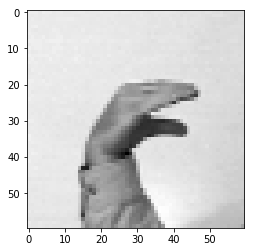

In [186]:
c = 151
temp = features2[c].reshape(60,60)
plt.imshow(temp,cmap='gray') 

In [187]:
 print (target2[c])

[2]
